# Customer Loyalty: An Exploration through Auto Insurance
- Christian Palisoc

Like any typical service offered to the public, there are many choices. Auto insurance companies are a prime example of this, where choosing a company to insure with is based on many things, but staying with them for an extended period of time is another factor in the profitability of an insurance company. We are going to explore how customer data affects their loyalty and ultimately, company profitability.


1. Source of data
  - https://www.kaggle.com/code/madhushreesannigrahi/jenks-natural-breaks-and-k-means-clustering/data

2. Brief description of data
  - Shows customer insurance rating factors and statistics by customer ID

3. What is the target?
  - Can be monthly premium auto or sales channel

4. What does one row represent? (A person?  A business?  An event? A product?)
  - A client (person)

5. Is this a classification or regression problem?
  - Depending on target, monthly premium can be regression or sales channel can be classification.

6. How many features does the data have?
  - 24

7. How many rows are in the dataset?
  - 9134

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?
  - None

In [141]:
# Standard Imports
import pandas as pd
import numpy as np
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling Imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
set_config(display='diagram')
from sklearn.decomposition import PCA

In [142]:
filename = '/Users/Chris Palisoc/Documents/Coding Dojo/Coding Dojo Project 2/AutoInsurance.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Clean and Explore the Data Set

# Inspect the data

In [143]:
# Display all columns
pd.set_option('display.max_column' , None)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [144]:
# Display number of rows and columns of dataframe
print(f'There are {df.shape[0]} rows and observations and {df.shape[1]} columns, and 1 target variable')

There are 9134 rows and observations and 24 columns, and 1 target variable


In [145]:
# Display column names and datatypes
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Clean the data

In [146]:
# Inspect column names for any errors
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Remove unnecessary columns

In [147]:
# Remove 'Customer' and 'Effective to Date'
df.drop(columns=['Customer','Effective To Date'] , inplace=True)

  - Removed 'Customer' and 'Effective to date' columns as we won't be dealing with time series and customer ID is not relevant to data

In [148]:
# Display any missing values
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## Remove unnecessary rows
  - There are no unnecessary rows

## Duplicates

In [149]:
# Display total number of duplicates
df.duplicated().sum()

163

In [150]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# Check if dropped
df.duplicated().sum()

0

## Inspect column datatypes for errors

In [151]:
# Display caolumn names and datatypes
df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

  - All columns have appropriate datatypes

## Inspect values for possible errors

In [152]:
# Display descriptive statistics for numerical columns
df.describe(include='number')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [153]:
# Display descriptive statistics for object columns
df.describe(include='object')

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3081,7826,5469,2704,5604,4579,5656,5210,6641,3334,3685,3394,4542,6311


  - All entries seem to be normal and nothing out of the ordinary or any outliers.

# Visuals for target and all features

## Target data
  - We will assign the target data to be the 'Customer Lifetime Value' in order to build a regression model that will accurately predict Lifetime Values given specific features of a client.
  - The following is a boxplot of the distribution of current values in our target feature.

C:\Users\Chris Palisoc\AppData\Local\Temp\ipykernel_11440\3140351841.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


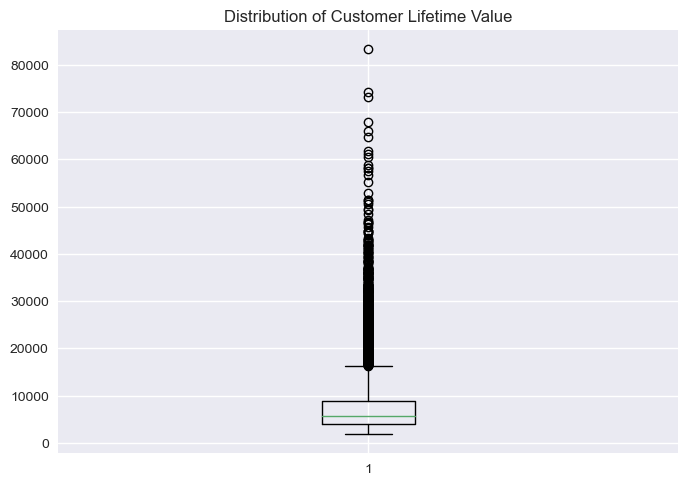

In [154]:
# Plot boxplot of target feature
plt.style.use('seaborn')
plt.title('Distribution of Customer Lifetime Value')
plt.boxplot(df['Customer Lifetime Value']);

## All other features
## The following are visual representations of the rest of the features in the dataset

  - Distribution of data for Income, Monthly auto premium, months since last claim, months since policy inception, and total claim amount features

C:\Users\Chris Palisoc\AppData\Local\Temp\ipykernel_11440\3244997229.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Total Claim Amount')

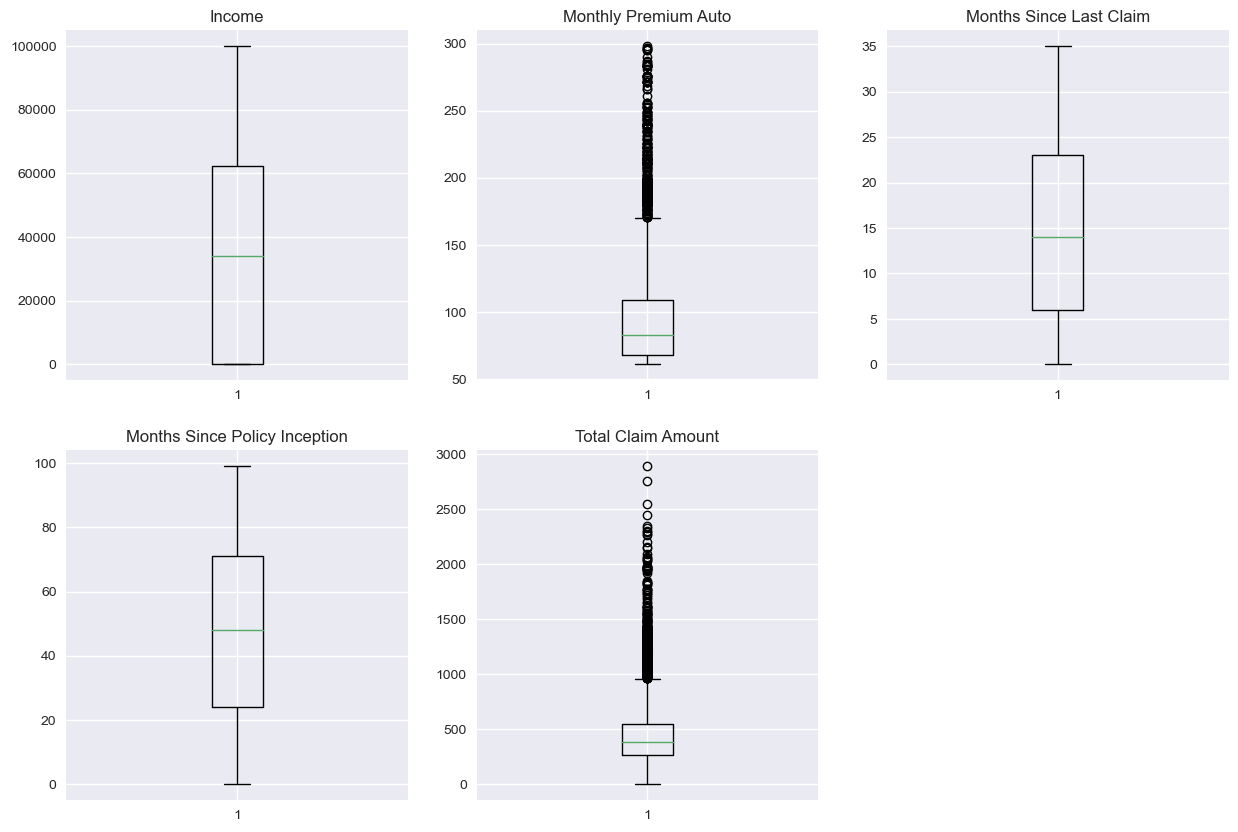

In [155]:
# Display boxplot showing distribution of some numerical features
plt.style.use('seaborn')
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.boxplot(df['Income']);
plt.title('Income')

plt.subplot(2, 3, 2)
plt.boxplot(df['Monthly Premium Auto']);
plt.title('Monthly Premium Auto')

plt.subplot(2, 3, 3)
plt.boxplot(df['Months Since Last Claim']);
plt.title('Months Since Last Claim')

plt.subplot(2, 3, 4)
plt.boxplot(df['Months Since Policy Inception']);
plt.title('Months Since Policy Inception')

plt.subplot(2, 3, 5)
plt.boxplot(df['Total Claim Amount']);
plt.title('Total Claim Amount')

  - Barplots showing the counts of values in the categorical features:

C:\Users\Chris Palisoc\AppData\Local\Temp\ipykernel_11440\784593602.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


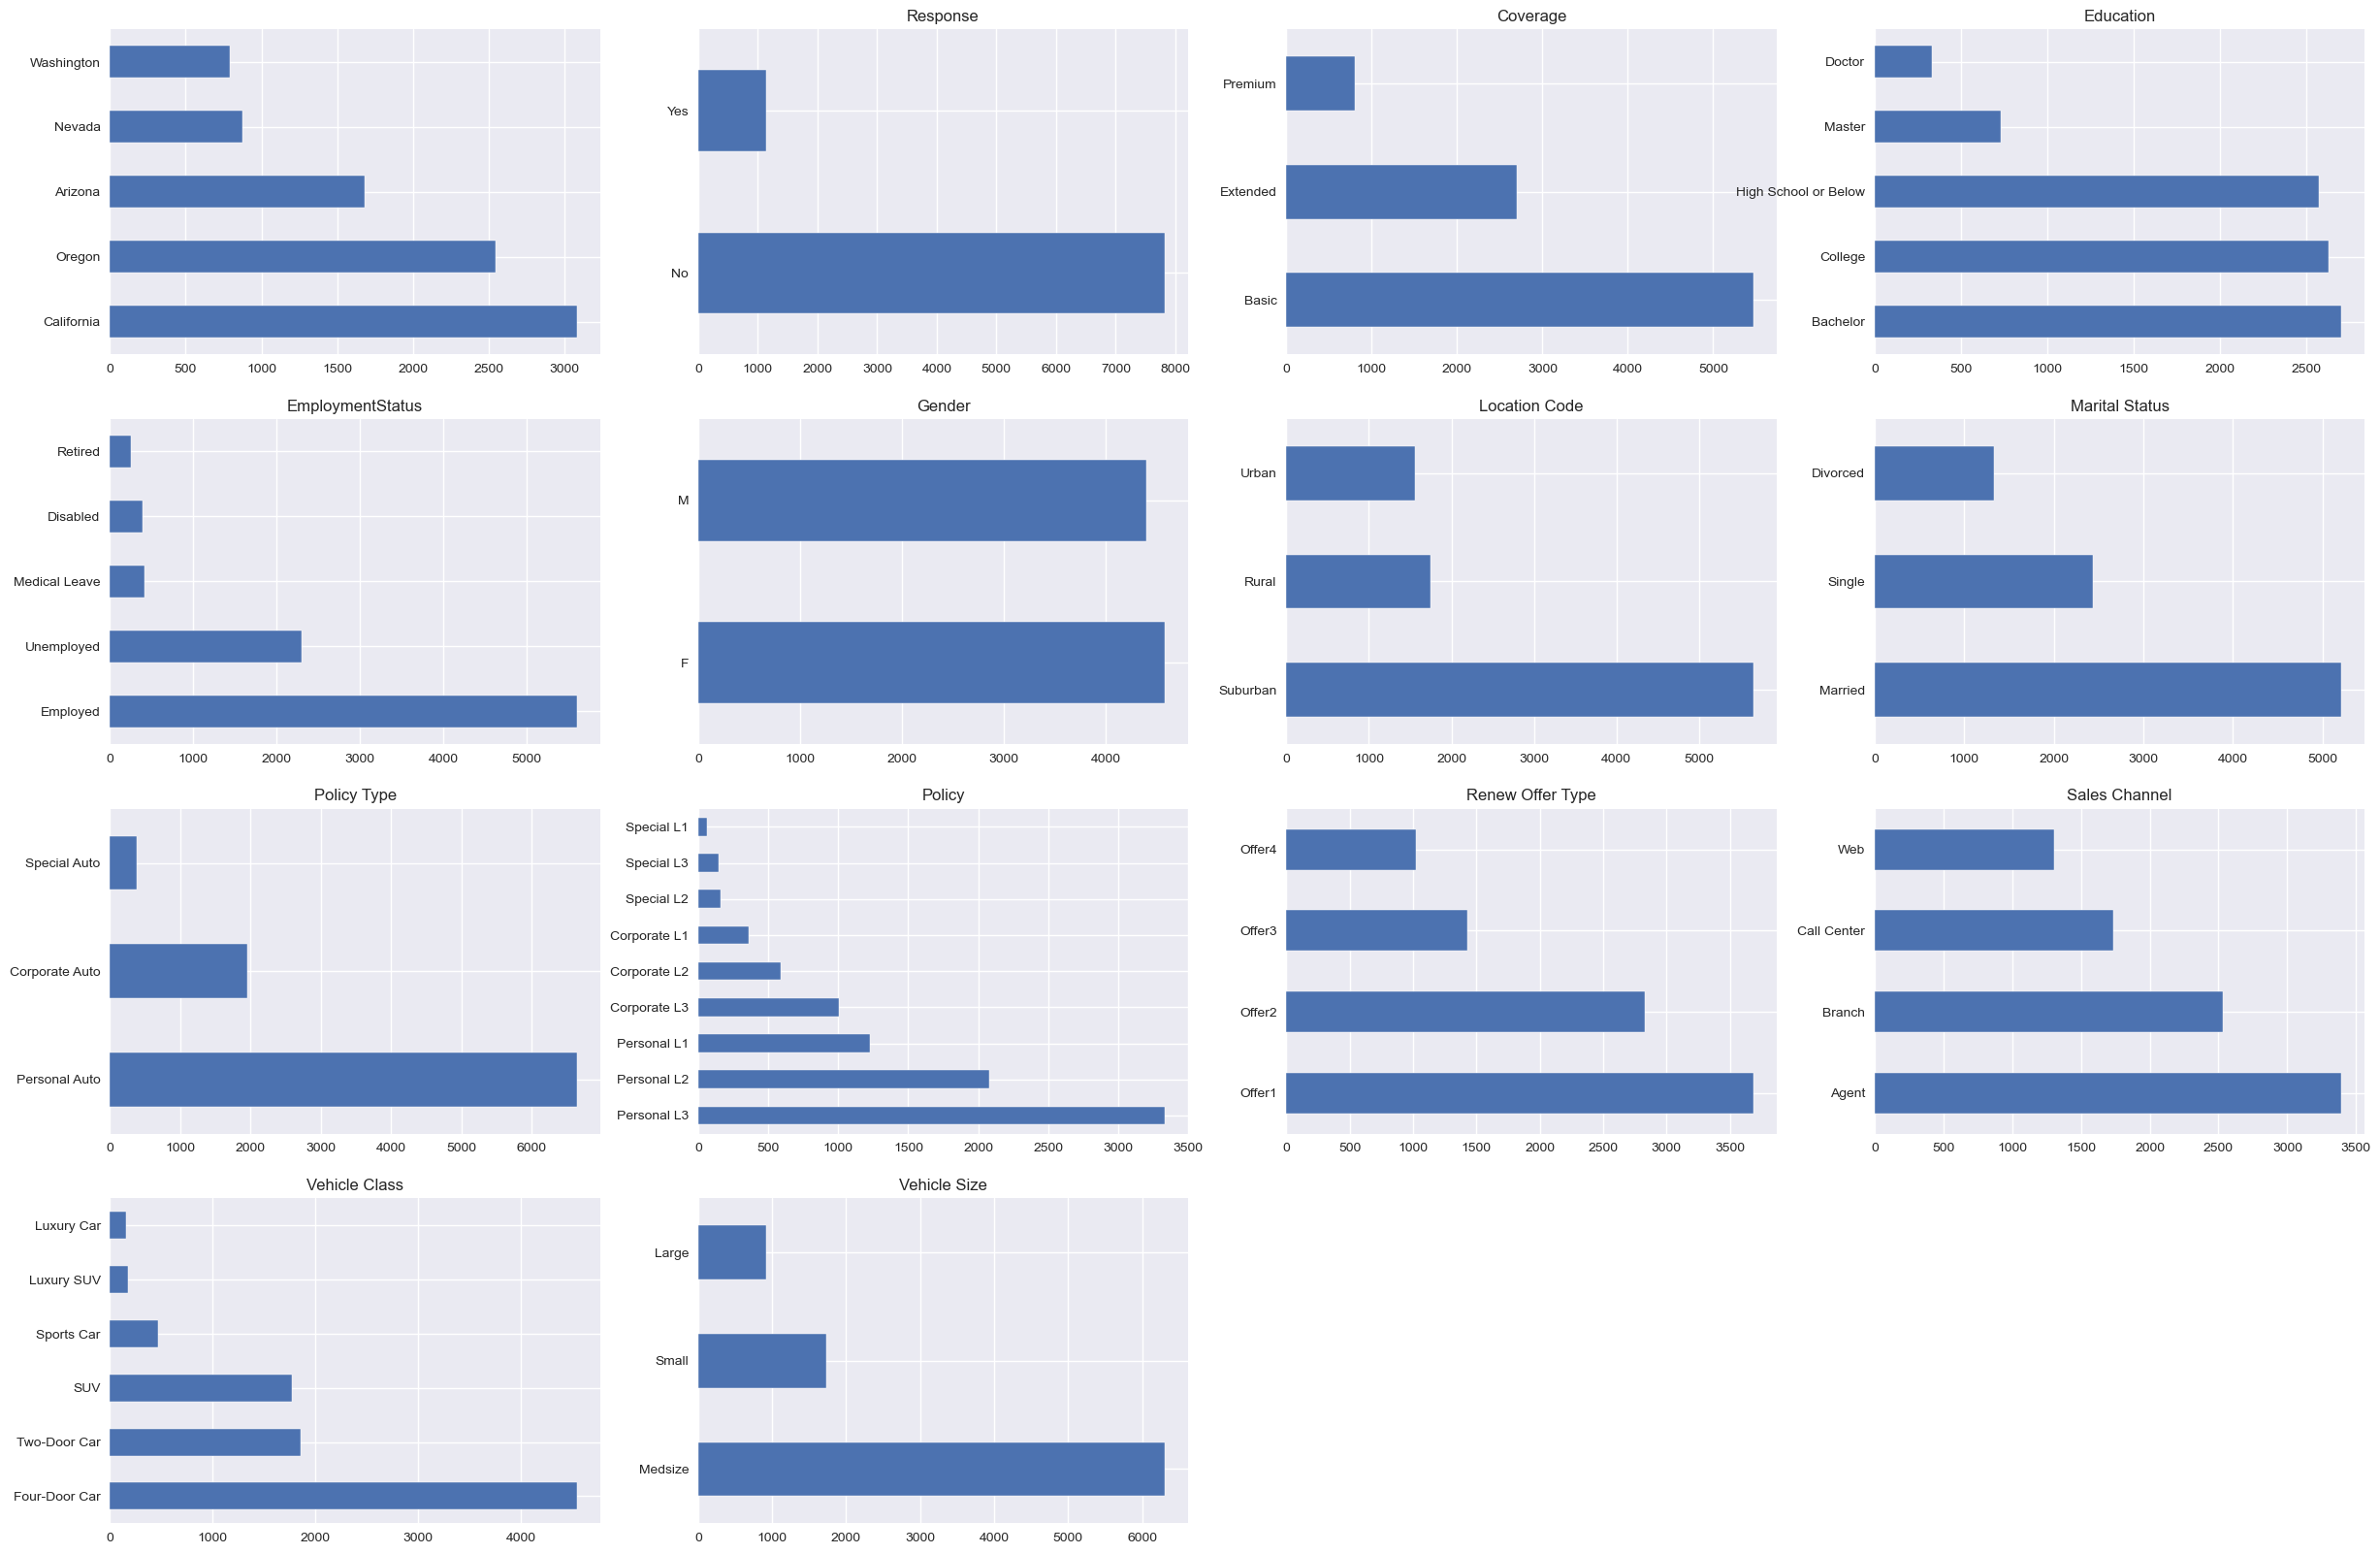

In [156]:
# Display barplot showing value counts for categorical features
plt.style.use('seaborn')
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
count1 = df['State'].value_counts()
plt.xlabel('Count')
count1.plot.barh();

plt.subplot(4,4,2)
count2 = df['Response'].value_counts()
plt.xlabel('Count')
plt.title('Response')
count2.plot.barh();

plt.subplot(4,4,3)
count3 = df['Coverage'].value_counts()
plt.xlabel('Count')
plt.title('Coverage')
count3.plot.barh();

plt.subplot(4,4,4)
count4 = df['Education'].value_counts()
plt.xlabel('Count')
plt.title('Education')
count4.plot.barh();

plt.subplot(4,4,5)
count5 = df['EmploymentStatus'].value_counts()
plt.xlabel('Count')
plt.title('EmploymentStatus')
count5.plot.barh();

plt.subplot(4,4,6)
count6 = df['Gender'].value_counts()
plt.xlabel('Count')
plt.title('Gender')
count6.plot.barh();

plt.subplot(4,4,7)
count7 = df['Location Code'].value_counts()
plt.xlabel('Count')
plt.title('Location Code')
count7.plot.barh();

plt.subplot(4,4,8)
count8 = df['Marital Status'].value_counts()
plt.xlabel('Count')
plt.title('Marital Status')
count8.plot.barh();

plt.subplot(4,4,9)
count9 = df['Policy Type'].value_counts()
plt.xlabel('Count')
plt.title('Policy Type')
count9.plot.barh();

plt.subplot(4,4,10)
count10 = df['Policy'].value_counts()
plt.xlabel('Count')
plt.title('Policy')
count10.plot.barh();

plt.subplot(4,4,11)
count11 = df['Renew Offer Type'].value_counts()
plt.xlabel('Count')
plt.title('Renew Offer Type')
count11.plot.barh();

plt.subplot(4,4,12)
count12 = df['Sales Channel'].value_counts()
plt.xlabel('Count')
plt.title('Sales Channel')
count12.plot.barh();

plt.subplot(4,4,13)
count13 = df['Vehicle Class'].value_counts()
plt.xlabel('Count')
plt.title('Vehicle Class')
count13.plot.barh();

plt.subplot(4,4,14)
count14 = df['Vehicle Size'].value_counts()
plt.xlabel('Count')
plt.title('Vehicle Size')
count14.plot.barh();

## Feature correlation

C:\Users\Chris Palisoc\AppData\Local\Temp\ipykernel_11440\1897386337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


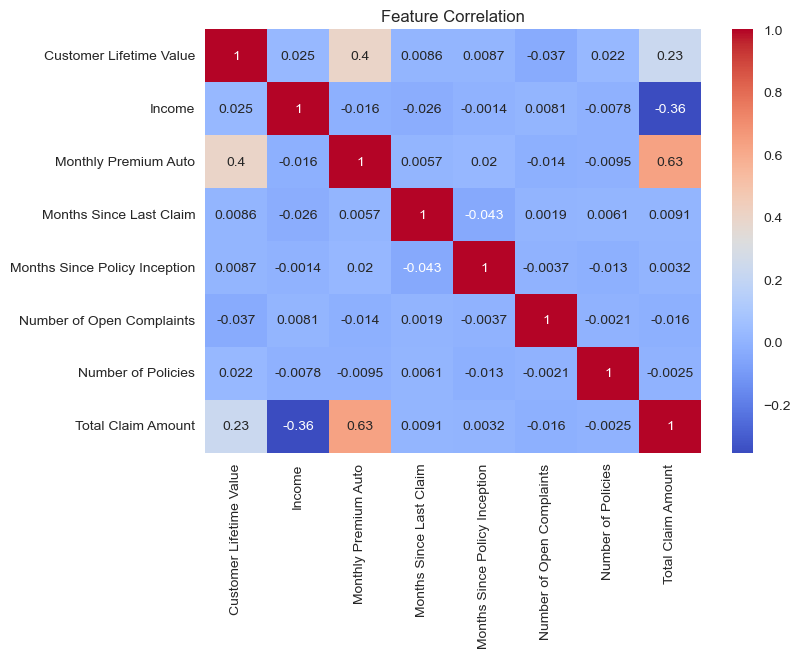

In [157]:
# Display a heatmap showing correlation between features
corr_matrix = df.corr()
plt.title('Feature Correlation')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);



<Figure size 5000x3000 with 0 Axes>

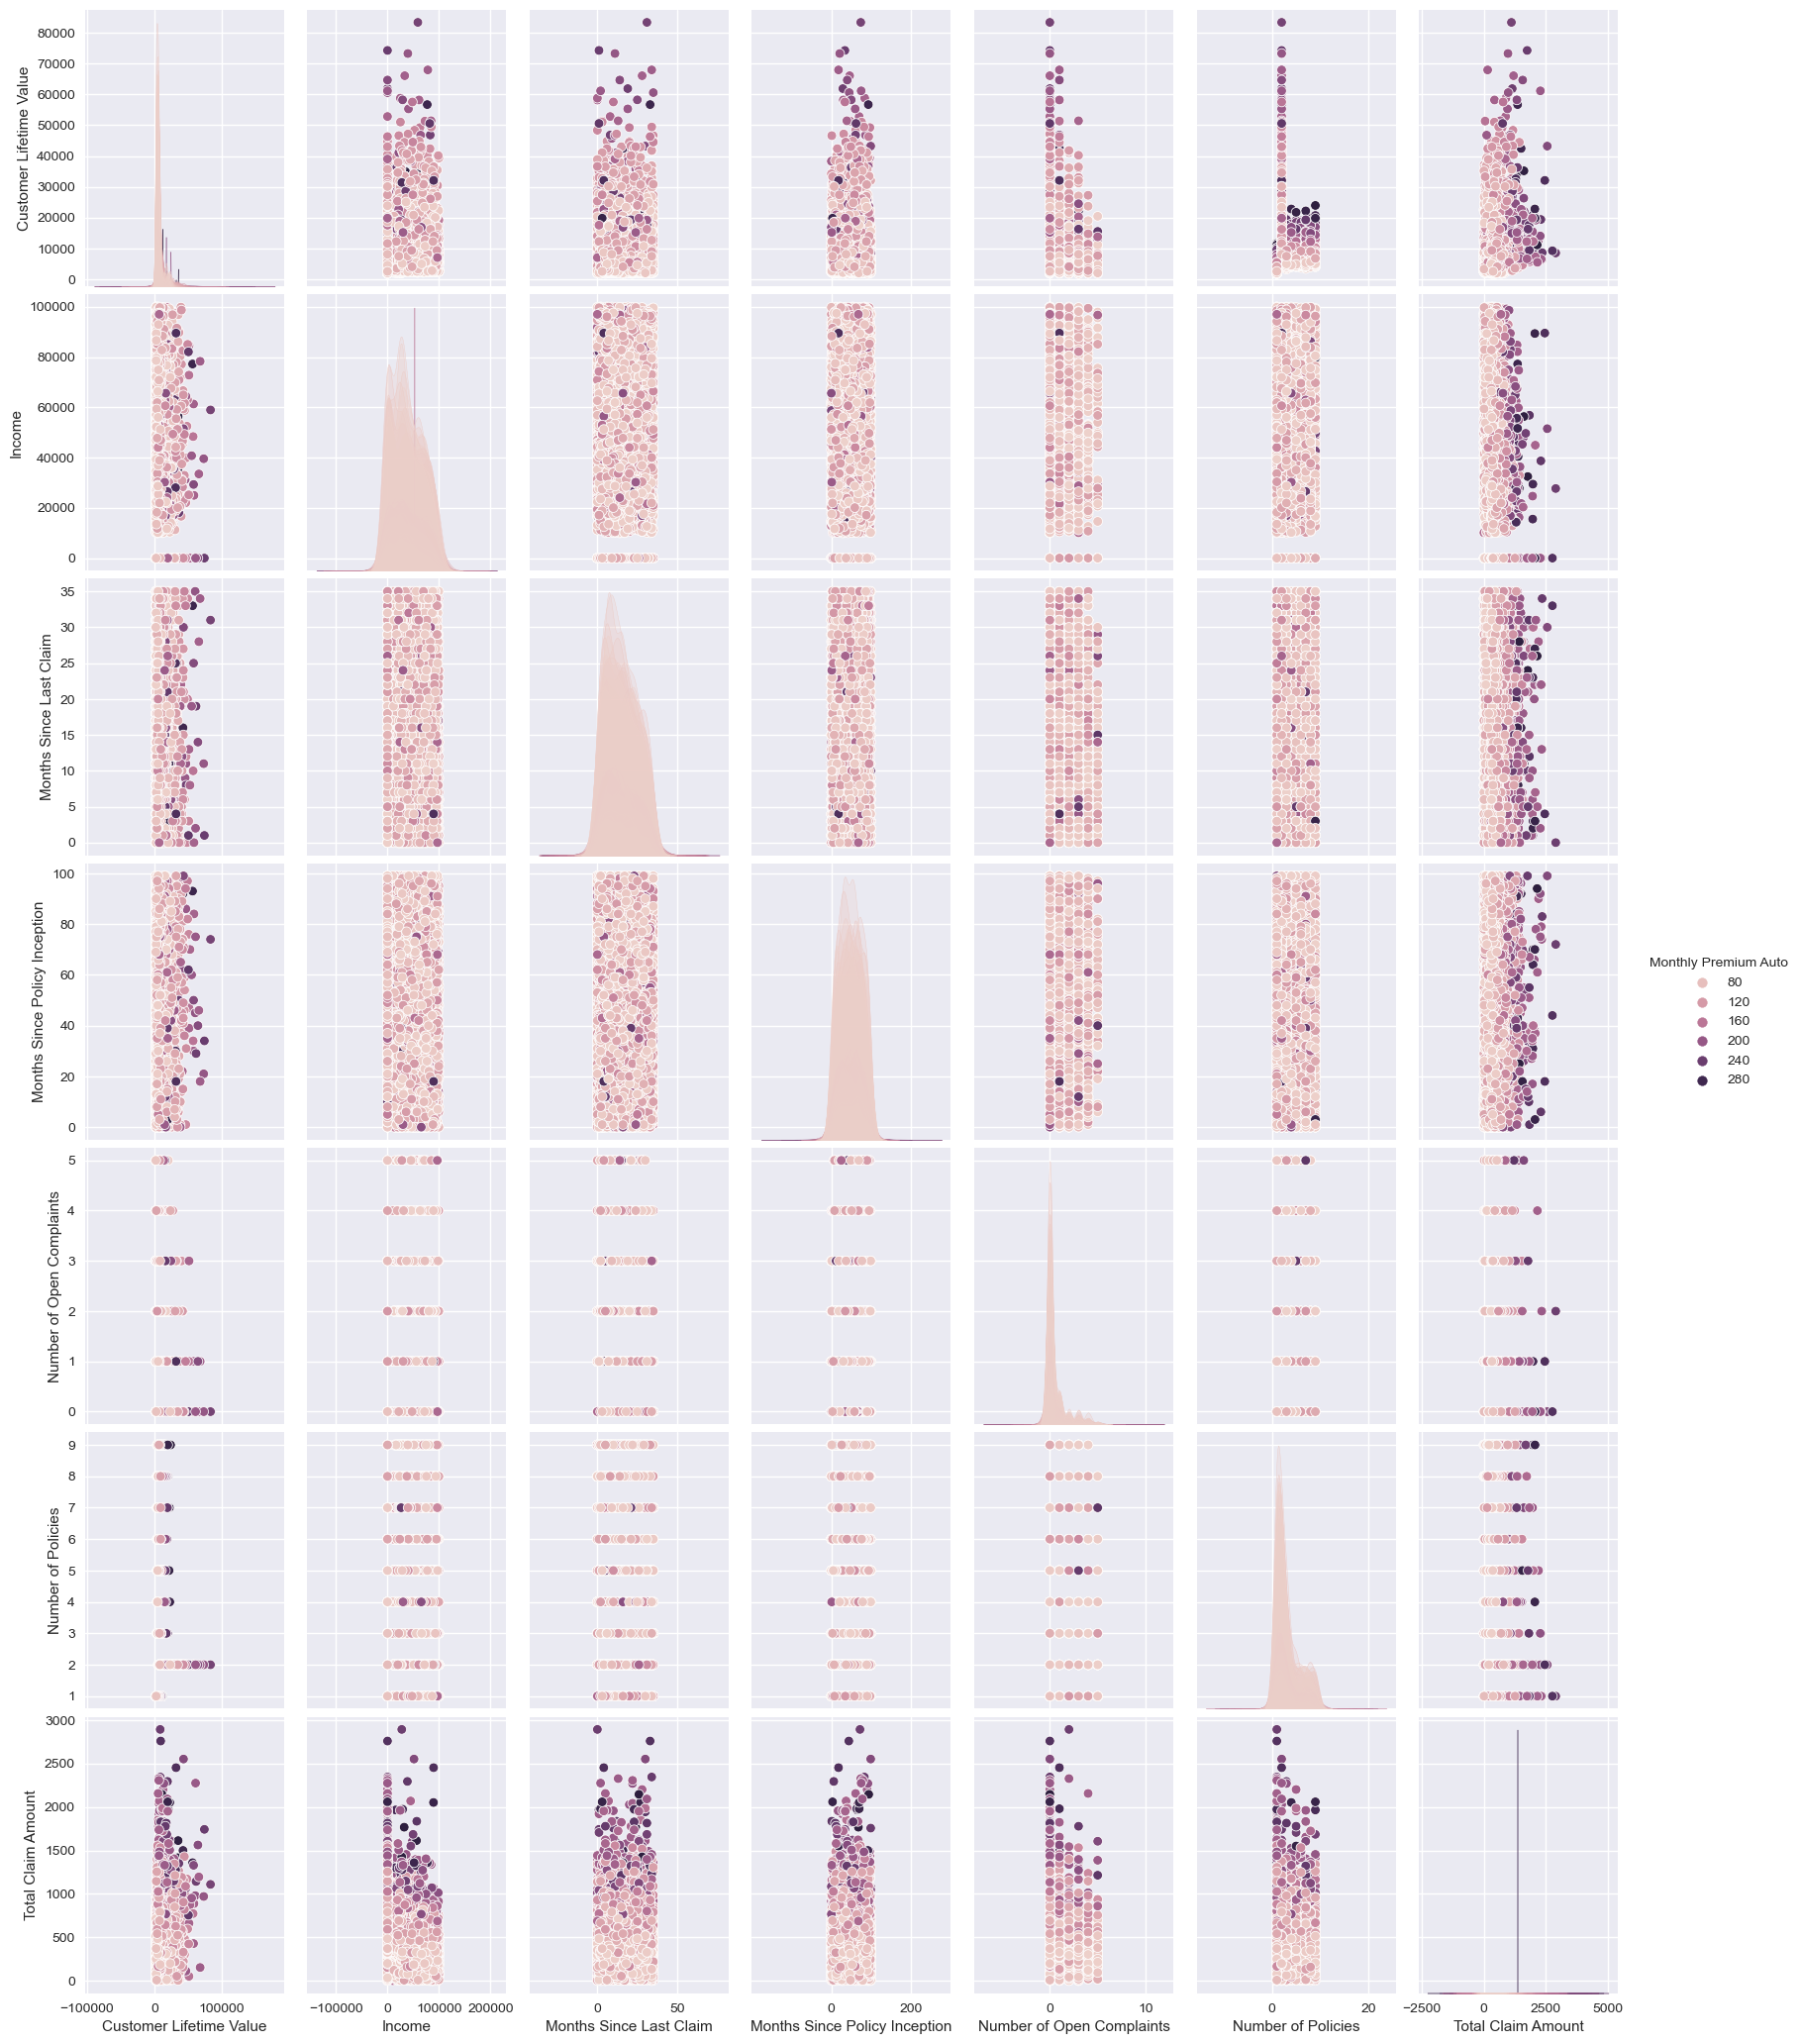

In [158]:
# Plot a pairplot to show visuals between features that may indicate a trend
plt.figure(figsize=(50,30))
sns.pairplot(df, height=3, aspect=.8, hue='Monthly Premium Auto');

- The heatmap above shows the correlation between the numerical features of our data, while the pairplot projects a visual of the corresponding feature pairs. Based on both plots, we can see that 'Monthly Premium Auto' paired with 'Customer Lifetime Value' and 'Monthly Premium Auto' paired with 'Total Claim Amount' had the strongest correlations. Other correlations worth noting are 'Total Claim Amount' vs 'Customer Lifetime Value', 'Number of Policies' vs 'Customer Lifetime Value', and 'Months Since Policy Inception' vs 'Monthly Premium Auto'

## 'Months Since Policy Inception' and 'Customer Lifetime Value'
- Since we are going to focus on the product distribution variations (target), we will see how it has an impact on the 'Months Since Policy Inception' (length of time insured) and 'Customer Lifetime Values' features.

In [159]:
# Display the categories of our target ('Sales Channel')
df['Sales Channel'].value_counts()

Agent          3394
Branch         2534
Call Center    1737
Web            1306
Name: Sales Channel, dtype: int64

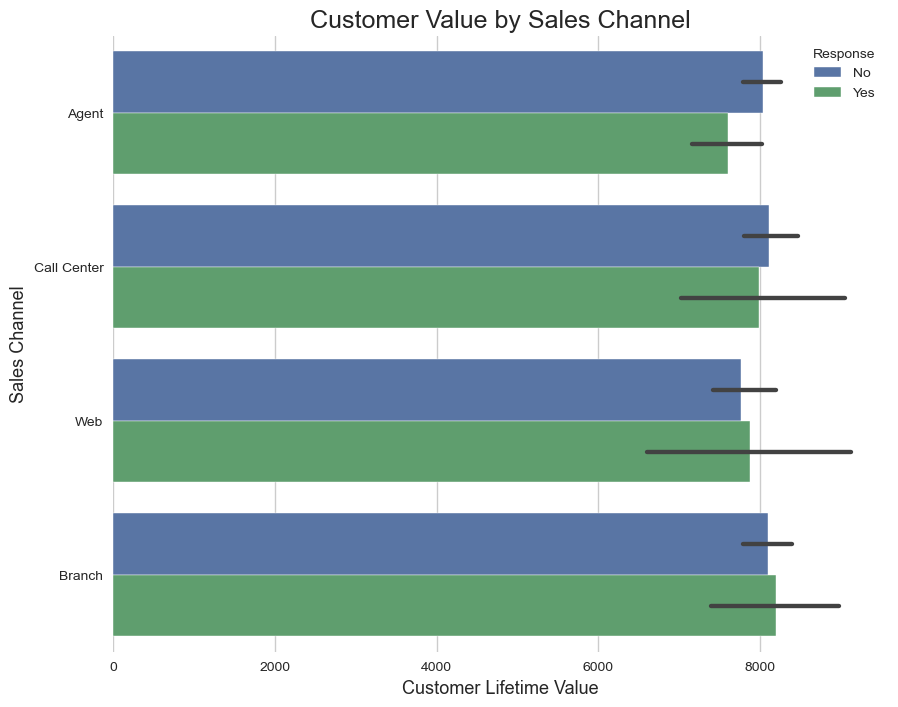

In [160]:
# Display a barplot of the categories of our Target feature vs 'Customer Lifetime Value'
##fig=plt.figure(figsize=(15,10))
##plt.style.use('seaborn')
##plt.xlabel('Customer Lifetime Value', fontsize=13)
##plt.ylabel('Distribution Channel', fontsize=13)
##plt.title('Customer Value by Sales Channel', fontsize=18)
##plt.barh(df['Sales Channel'] , df['Customer Lifetime Value'], hue='Sales Channel');

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='Customer Lifetime Value', y='Sales Channel', hue='Response', data=df)
plt.xlabel('Customer Lifetime Value', fontsize=13)
plt.ylabel('Sales Channel', fontsize=13)
plt.title('Customer Value by Sales Channel', fontsize=18)
plt.show()

- The above graphic above illustrates which sales the value a customer experiences from their insurance carrier by method of purchase, or distribution channel. 

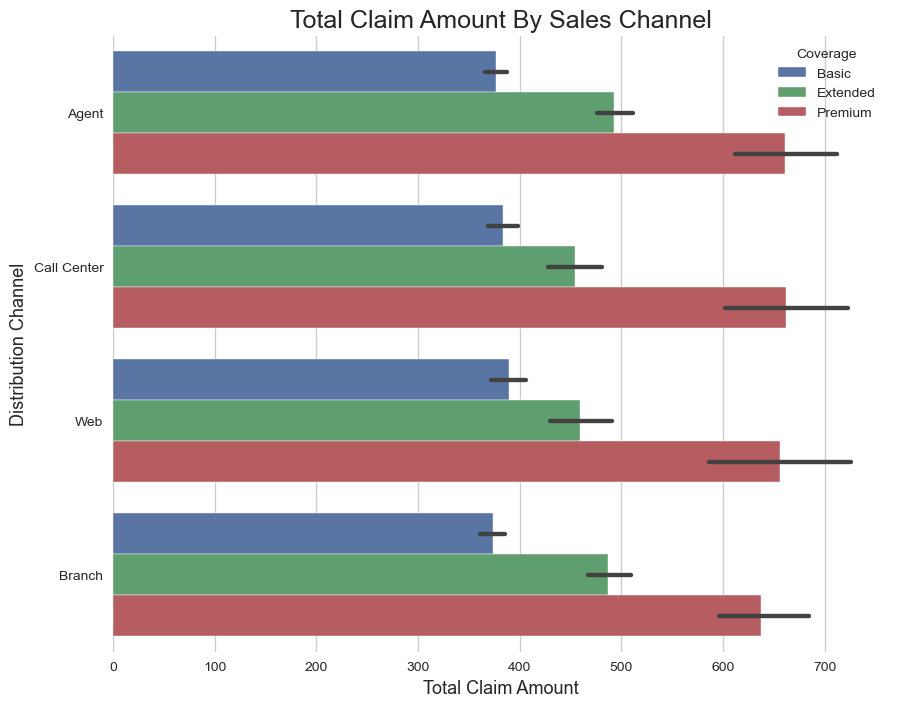

In [161]:
# Display a barplot of the categories of our Target feature vs 'Total Claim Amount'
#fig=plt.figure(figsize=(15,10))
#plt.style.use('seaborn')
#plt.xlabel('Total Claim Amount', fontsize=13)
#plt.ylabel('Distribution Channel', fontsize=13)
#plt.title('Total Claim Amount by Sales Channel', fontsize=18)
#plt.barh(df['Sales Channel'] , df['Total Claim Amount'] , color='Green');

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Claim Amount', y='Sales Channel', hue='Coverage', data=df)
plt.xlabel('Total Claim Amount', fontsize=13)
plt.ylabel('Distribution Channel', fontsize=13)
plt.title('Total Claim Amount By Sales Channel', fontsize=18)
plt.show()



- In this graphic, it shows the claim payouts by sales channel--how the more and less 'responsible' clients purchase their policies by the type of coverage selected. 

# Regression models

The following are three models that we are going to deploy on the data to test to determine which is best fit. We are going to assign our target feature to be 'Customer Lifetime Value'. We are going to first run a model using the baseline parameters and then a tuned version for all three models. 

## X/y Split and Preprocessing

In [162]:
# Define X and y features for modeling
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
# Preprocessing
scaler = StandardScaler()
ohe = OneHotEncoder()
# selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
# nothing to impute, skip to pipelines
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)
# tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7F70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7A60>)])

## Decision Tree Regressor model

## Baseline Model (untuned)

In [66]:
# Instantiate Decision Tree Regressor Model
dectree = DecisionTreeRegressor(random_state=42)
# Make model pipeline
dectree_pipe = make_pipeline(preprocessor, dectree)
# Fit model pipeline on to data
dectree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [67]:
# Evaluate model
print('Train Score of base decision tree regressor:' , dectree_pipe.score(X_train, y_train))
print('Test Score of base decision tree regressor:' , dectree_pipe.score(X_test, y_test))

Train Score of base decision tree regressor: 1.0
Test Score of base decision tree regressor: 0.37665607877370666


## Tuned Model

In [68]:
# Instantiate tuned decision tree regressor
dectree_tuned = DecisionTreeRegressor(random_state=42)
# make model pipeline
dectree_tuned_pipe = make_pipeline(preprocessor, dectree_tuned)
# display parameters to tune
dectree_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
        

In [69]:
# create a parameter grid for selected parameters
param_grid = {'decisiontreeregressor__max_depth':[5,10,15,20,25],
             'decisiontreeregressor__min_samples_leaf':[1,2,3,4,5]}
# create pipeline of model with tuned parameters
dectree_tuned_GSpipe = GridSearchCV(dectree_tuned_pipe, param_grid)
# fit pope on data and display best parameters
dectree_tuned_GSpipe.fit(X_train, y_train)
print('Decision Tree Regressor Parameters:')
print(dectree_tuned_GSpipe.best_params_)
best_pipe = dectree_tuned_GSpipe.best_estimator_
print(f'Score of best Decision Tree Regressor model is: {best_pipe.score(X_test, y_test)}')

Decision Tree Regressor Parameters:
{'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 1}
Score of best Decision Tree Regressor model is: 0.6636833329953654


## Bagged Tree Model

## Baseline model (untuned)

In [70]:
# Instantiate Bagged Tree Regressor
bagreg = BaggingRegressor(random_state=42)
# Make model pipeline
bagreg_pipe = make_pipeline(preprocessor, bagreg)
# Fit model on data
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [71]:
# Evaluate model
print('Train Score of base bagged tree regressor:' , bagreg_pipe.score(X_train, y_train))
print('Test Score of base bagged tree regressor:' , bagreg_pipe.score(X_test, y_test))

Train Score of base bagged tree regressor: 0.936693710333997
Test Score of base bagged tree regressor: 0.6472221281026849


## Tuned Model

In [72]:
# Instantiated tuned bagged tree regressor
bagreg_tuned = BaggingRegressor(random_state=42)
# make model pipeline
bagreg_tuned_pipe = make_pipeline(preprocessor, bagreg_tuned)
# display parameters to tune
bagreg_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                  

In [73]:
# create a parameter grid for selected parameters
param_grid = {'baggingregressor__n_estimators': [10,20,40,60,80],
             'baggingregressor__max_samples': [120,140,160,180,200],
             'baggingregressor__max_features': [20,40,60,80]}
# create pipeline of model with tuned parameters
bagreg_tuned_GSpipe = GridSearchCV(bagreg_tuned_pipe, param_grid)
# fit pope on data and display best parameters
bagreg_tuned_GSpipe.fit(X_train, y_train)
print('Best Bagged Tree Regressor Parameters:')
print(bagreg_tuned_GSpipe.best_params_)
best_pipe = bagreg_tuned_GSpipe.best_estimator_
print(f'Score of best Bagged Tree Regressor model is: {best_pipe.score(X_test, y_test)}')

C:\Users\Chris Palisoc\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chris Palisoc\anaconda3\envs\dojo-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chris Palisoc\anaconda3\envs\dojo-env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Chris Palisoc\anaconda3\envs\dojo-env\lib\site-packages\sklearn\ensemble\

Best Bagged Tree Regressor Parameters:
{'baggingregressor__max_features': 60, 'baggingregressor__max_samples': 200, 'baggingregressor__n_estimators': 80}
Score of best Bagged Tree Regressor model is: 0.6556777266781453


## Random Forest Model

## Baseline Model (untuned)

In [74]:
# Instantiate random forest model
rf = RandomForestRegressor(random_state=42)
# make model pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# fit on model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [75]:
# Evaluate Model
print(f'Train score of base random forest regression model: {rf_pipe.score(X_train, y_train)}')
print(f'Test score of base random forest regresson model: {rf_pipe.score(X_test, y_test)}')

Train score of base random forest regression model: 0.9563676045049322
Test score of base random forest regresson model: 0.6712146821331344


## Tuned Model

In [76]:
# Instantiate model
rf_tuned = RandomForestRegressor(random_state=42)
# Make pipeline
rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)
# display parameters of model pipeline
rf_tuned_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B2E0473D0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B36E29EB0>)])),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
        

In [77]:
# create a parameter grid for selected parameters
param_grid = {'randomforestregressor__max_depth': [11,12,13,14,15],
             'randomforestregressor__n_estimators': [200,250,300,350,400]}
# create pipeline with parameter grid and model
rf_tuned_gs = GridSearchCV(rf_tuned_pipe, param_grid)
# fit gridsearchcv pipe on data and display best parameters along with score
rf_tuned_gs.fit(X_train, y_train)
print('Best Random Forest Regressor Parameters:')
print(rf_tuned_gs.best_params_)
best_pipe2 = rf_tuned_gs.best_estimator_
print(f'Score of best random forest model is: {best_pipe2.score(X_test, y_test)}')

Best Random Forest Regressor Parameters:
{'randomforestregressor__max_depth': 14, 'randomforestregressor__n_estimators': 400}
Score of best random forest model is: 0.6746553975999987


In [78]:
# make model predictions
rf_train_preds = best_pipe2.predict(X_train)
rf_test_preds = best_pipe2.predict(X_test)
# display model metrics based on predictions
# Train
mae = round(mean_absolute_error(y_train, rf_train_preds),4)
mse = round(mean_squared_error(y_train, rf_train_preds),4)
rmse = round(np.sqrt(mean_squared_error(y_train, rf_train_preds)),4)
r2 = round(r2_score(y_train, rf_train_preds),6)
print('Tuned Random Forest Train Scores')
print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')
# Test
mae = round(mean_absolute_error(y_test, rf_test_preds),4)
mse = round(mean_squared_error(y_test, rf_test_preds),4)
rmse = round(np.sqrt(mean_squared_error(y_test, rf_test_preds)),4)
r2 = round(r2_score(y_test, rf_test_preds),6)
print('Tuned Random Forest Test Scores')
print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

Tuned Random Forest Train Scores
MAE: 740.1215 
MSE: 3,230,630.8591 
RMSE: 1,797.3956 
R2: 0.9322

Tuned Random Forest Test Scores
MAE: 1,535.8822 
MSE: 14,860,484.1760 
RMSE: 3,854.9299 
R2: 0.6747



## Use PCA to Improve Modeling Results

In [37]:
# Instantiate PCA
pca1 = PCA()
# transform pre-processed data using for PCA fitting 
processed_df = preprocessor.fit_transform(df)
# fit transformed data for PCA
pca1.fit(processed_df)
# display the variance for each number of components
pd.Series(pca1.explained_variance_ratio_) 


0     1.357580e-01
1     9.130457e-02
2     6.528203e-02
3     6.261772e-02
4     6.229136e-02
          ...     
60    8.733762e-34
61    8.733762e-34
62    8.733762e-34
63    2.230872e-34
64    1.722693e-34
Length: 65, dtype: float64

C:\Users\Chris Palisoc\AppData\Local\Temp\ipykernel_11440\3026552062.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


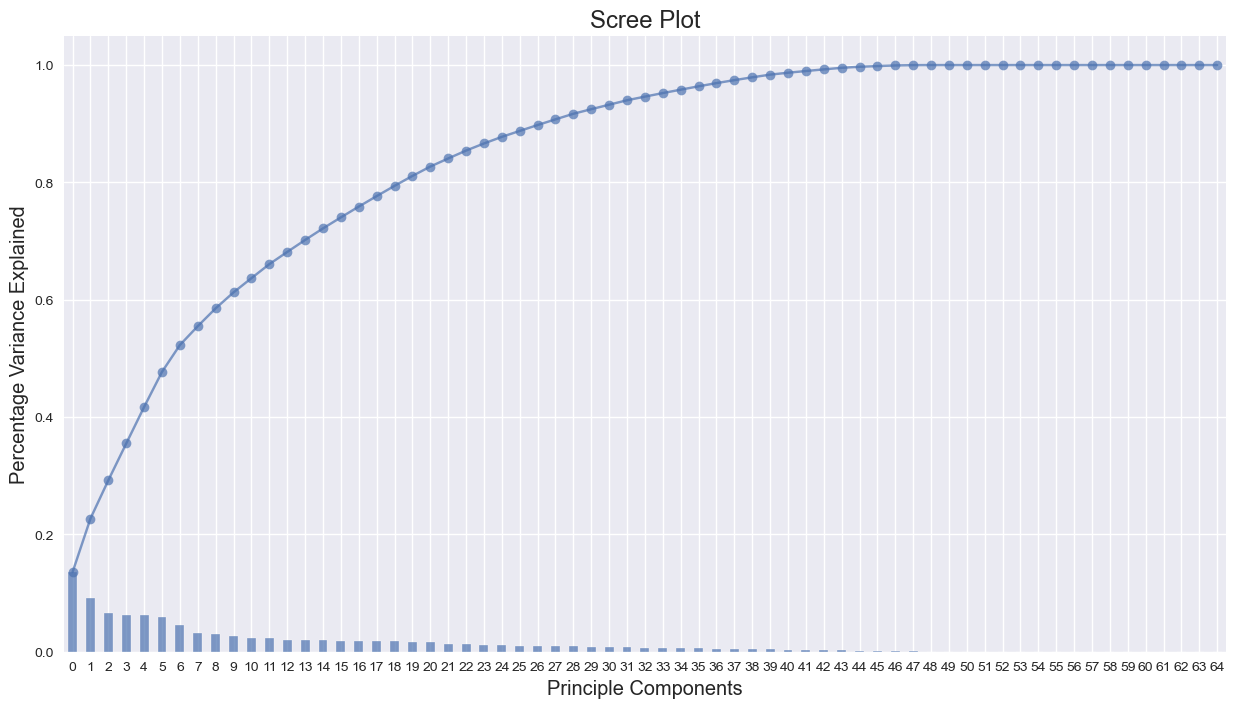

In [38]:
# Create a Scree plot to find optimal number of components for PCA
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca1.explained_variance_ratio_)

exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

## Using PCA = 18 on base Random Forest model

In [170]:
# Intantiate PCA
pca = PCA(n_components=18)
# make transformer pipeline w/pca
transformer = make_pipeline(preprocessor, pca)
# make random forest pipe w/transformer
rf_pca_pipe = make_pipeline(transformer, rf)
# fit data
rf_pca_pipe.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7F70>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7A60>)])),
                                 ('pca', PCA(n_components=18))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [171]:
# Evaluate Model
print(f'Train score of PCA random forest regression model: {rf_pca_pipe.score(X_train, y_train)}')
print(f'Test score of PCA random forest regresson model: {rf_pca_pipe.score(X_test, y_test)}')

Train score of PCA random forest regression model: 0.9244493724723286
Test score of PCA random forest regresson model: 0.5430960895797231


- Between the three regression models (decision tree, bagged tree, and random forest) used to predict 'Customer Lifetime Value', the best results were produced by a tuned random forest model with an R2 score of 67.46%. The result, however, was only .3% better than the baseline parameters of a normal random forest model. Even after applying Principle Component Analysis and finding the optimal components = 18 still produced a worse random forest R2 score than our baseline random forest.

# Feature Engineering
The following section we are going to feature engineer our 'Income' column by binning it into 5 different income ranges and then apply it to one of the tuned models to see if we can obtain a better R2 score and smaller errors.

In [172]:
# make a copy of 'df' and assign it as 'df2' for featured engineering
df2 = df.copy()

In [173]:
# inspect df2
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   object 
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   object 
 3   Coverage                       8971 non-null   object 
 4   Education                      8971 non-null   object 
 5   EmploymentStatus               8971 non-null   object 
 6   Gender                         8971 non-null   object 
 7   Income                         8971 non-null   int64  
 8   Location Code                  8971 non-null   object 
 9   Marital Status                 8971 non-null   object 
 10  Monthly Premium Auto           8971 non-null   int64  
 11  Months Since Last Claim        8971 non-null   int64  
 12  Months Since Policy Inception  8971 non-null   i

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [174]:
# display numerical feature statistics 
df2.describe(include='number')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [175]:
# create lambda function for 'Income' feature binning values into 5 groups:
# $0-20K, $20K-40K, $40K-60K, $60K-80K, $80K-100K
def income_bin(x):
    if x<20000:
        return '$0-20K'
    elif x<40000:
        return '$20K-40K'
    elif x<60000:
        return '$40K-60K'
    elif x<80000:
        return '$60K-80K'
    else:
        return '$80K-100K'

df2['Income'] = df2['Income'].apply(income_bin)
# inspect updated dataframe
df2.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,$40K-60K,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,$0-20K,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,$40K-60K,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,$0-20K,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,$40K-60K,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Modeling feature engineered Dataframe

In [176]:
# Define X and y features for modeling
X = df2.drop(columns='Customer Lifetime Value')
y = df2['Customer Lifetime Value']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [177]:
# Intantiate PCA
pca = PCA(n_components=18)
# make transformer pipeline w/pca
transformer = make_pipeline(preprocessor, pca)
# make random forest pipe w/transformer
rf_pca_pipe = make_pipeline(transformer, rf)
# fit data
rf_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7F70>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000023B335F7A60>)])),
                                 ('pca', PCA(n_components=18))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [178]:
# Evaluate Model
print(f'Train score of PCA random forest regression model: {rf_pca_pipe.score(X_train, y_train)}')
print(f'Test score of PCA random forest regresson model: {rf_pca_pipe.score(X_test, y_test)}')

Train score of PCA random forest regression model: 0.9037580054789732
Test score of PCA random forest regresson model: 0.4240062069892827
